# Prosper Loan Data Exploration
## by ADEDEJI YAKUB

## 1. Introduction
This document explores a dataset containing loan amount, Borrower Income( Stated Monthly Income), Debt-Income-Ratio, Loan Term, Prosper Score, and many others for approximately 114,000 rows of loan data.<br>

For better understanding of variables, [Here's a link to the data dictionary](https://docs.google.com/spreadsheets/u/0/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing)



## 2. Preliminary Wrangling
### 2.1 Gather

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
print(df.shape)
print(df.columns)

(113937, 81)
Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
 

In [4]:
#extracting relevant columns
df = df[['ListingNumber','Term', 'LoanStatus', 'IncomeRange',
             'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
             'EmploymentStatus', 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'IsBorrowerHomeowner',
             'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment']]
df.head()

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
0,193129,36,Completed,"$25,000-49,999",NaN,NaN,0,CO,Other,Self-employed,2.0,0.17,True,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43
1,1209647,36,Current,"$50,000-74,999",A,7.0,2,CO,Professional,Employed,44.0,0.18,False,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93
2,81716,36,Completed,Not displayed,NaN,NaN,0,GA,Other,Not available,NaN,0.06,False,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,123.32
3,658116,36,Current,"$25,000-49,999",A,9.0,16,GA,Skilled Labor,Employed,113.0,0.15,True,2875.000000,10000,2012-11-01 00:00:00,Q4 2012,321.45
4,909464,36,Current,"$100,000+",D,4.0,2,MN,Executive,Employed,44.0,0.26,True,9583.333333,15000,2013-09-20 00:00:00,Q3 2013,563.97


### 2.2 Assess

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   IncomeRange                113937 non-null  object 
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ProsperScore               84853 non-null   float64
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   BorrowerState              108422 non-null  object 
 8   Occupation                 110349 non-null  object 
 9   EmploymentStatus           111682 non-null  object 
 10  EmploymentStatusDuration   106312 non-null  float64
 11  DebtToIncomeRatio          105383 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  StatedMonthlyIncome        11


-Null values in ProsperRating, ProsperScore, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration and DebtToIncomeRatio columns.

-ListingNumber should be string datatype, LoanStatus to categorical, ProsperRating to ordered categorical datatype, EmploymentStatus to categorical, LoanOriginationDate to datetime datatype, IsBorrowerHomeowner to categorical.


### 2.3 Clean

In [6]:
df_clean = df.copy()
#sorting out the null problems
df_clean = df_clean[df_clean['ProsperScore'].notnull()]
df_clean = df_clean[df_clean['ProsperRating (Alpha)'].notnull()]
df_clean = df_clean[df_clean['DebtToIncomeRatio'].notnull()]

In [7]:
df_clean['Occupation'] = df_clean['Occupation'].fillna('Unknown')
df_clean = df_clean[df_clean['EmploymentStatusDuration'].notnull()]

In [8]:
#sorting out the datatype problems
df_clean['StatedMonthlyIncome'] = df_clean['StatedMonthlyIncome'].astype(np.int32)
df_clean['IsBorrowerHomeowner'].replace(True, 'True', inplace=True)
df_clean['IsBorrowerHomeowner'].replace(False, 'False', inplace=True)
df_clean['LoanOriginationDate'] = pd.to_datetime(df_clean['LoanOriginationDate'])
df_clean['LoanOriginationYear'] = df_clean['LoanOriginationDate'].dt.year
df_clean['LoanOriginationMonth'] = df_clean['LoanOriginationDate'].dt.month
df_clean['LoanOriginationMonth'] = df_clean['LoanOriginationMonth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
        ['January','Febuary', 'March','April','May','June','July','August','September','October','November','December'])
df_clean['ListingNumber'] = df_clean['ListingNumber'].astype(str)

In [9]:
#for ordered categorical conversion,
ordinal_var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress'
                                   ,'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                   'LoanOriginationMonth': ['January','Febuary', 'March','April','May','June','July','August','September',
                                            'October','November','December'],
                   'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],
                   'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)
    
df_clean.EmploymentStatus = df_clean.EmploymentStatus.astype('category')

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingNumber              77543 non-null  object        
 1   Term                       77543 non-null  int64         
 2   LoanStatus                 77543 non-null  category      
 3   IncomeRange                77543 non-null  category      
 4   ProsperRating (Alpha)      77543 non-null  category      
 5   ProsperScore               77543 non-null  category      
 6   ListingCategory (numeric)  77543 non-null  int64         
 7   BorrowerState              77543 non-null  object        
 8   Occupation                 77543 non-null  object        
 9   EmploymentStatus           77543 non-null  category      
 10  EmploymentStatusDuration   77543 non-null  float64       
 11  DebtToIncomeRatio          77543 non-null  float64       
 12  IsB

In [11]:
df_clean.describe()

,Term,ListingCategory (numeric),EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000
mean,42.724630,3.284681,104.240757,0.258739,5963.147815,9269.504688,295.759460
std,11.712344,4.385117,96.790960,0.318347,5082.339830,6398.196398,189.326004
min,12.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,36.000000,1.000000,31.000000,0.150000,3533.000000,4000.000000,158.490000
50%,36.000000,1.000000,75.000000,0.220000,5000.000000,8000.000000,256.390000
75%,60.000000,3.000000,149.000000,0.320000,7166.000000,14500.000000,392.280000
max,60.000000,20.000000,755.000000,10.010000,483333.000000,35000.000000,2251.510000


### What is the structure of your dataset?

There are 74,035 Prosper Loan listings information in the dataset with 20 variables (ListingNumber, Term, LoanStatus, ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, IncomeRange, EmploymentStatusDuration, IsBorrowerHomeowner, LoanMonthsSinceOrigination, StatedMonthlyIncome, LoanOriginalAmount, LoanOriginationQuarter, MonthlyLoanPayment, LoanOriginationYear, LoanOriginationMonth and, LoanOriginationTime.<br>

For better understanding of variables, [Here's a link to the data dictionary]
(https://docs.google.com/spreadsheets/u/0/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing)

### What is/are the main feature(s) of interest in your dataset?

The main feature of my dataset is the LoanOriginalAmount as I would like to investigate patterns in the giving of loans over the years.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

StatedMonthlyIncome, IsBorrowerHomeOwner, LoanOriginationMonth and LoanOriginationYear 

## 3. Univariate Exploration

### QUESTION 1: What is the distribution of StatedMonthlyIncome

### Visualization

C:\Users\Yakub Adedeji\anaconda3\envs\personals\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='StatedMonthlyIncome'>

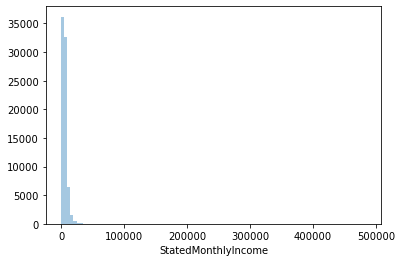

In [12]:
basecolor = sns.color_palette()[0]
#To view the distribution of StatedMonthlyIncome
sns.distplot(df_clean['StatedMonthlyIncome'], bins=100, kde=False)

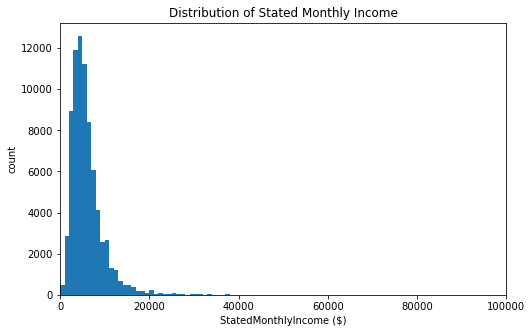

In [13]:
#using matplotlib
binsize = 1000
bins = np.arange(0, df_clean['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('count')
plt.xlim(0, 100000)
plt.title('Distribution of Stated Monthly Income');
plt.show()

In [14]:
#The data seems to have a lot of outliers. This needs to be cleaned up
# Using interquartile ranges to detect outliers,
q1 = df_clean['StatedMonthlyIncome'].quantile(0.25)
q3 = df_clean['StatedMonthlyIncome'].quantile(0.75)
iqr = q3 - q1
lowerLimit = q1 - 1.5*iqr  #Lower outlier
upperLimit = q3 + 1.5*iqr  #upper outlier
df_clean = df_clean[df_clean['StatedMonthlyIncome'] < upperLimit]
df_clean.shape

(74035, 20)

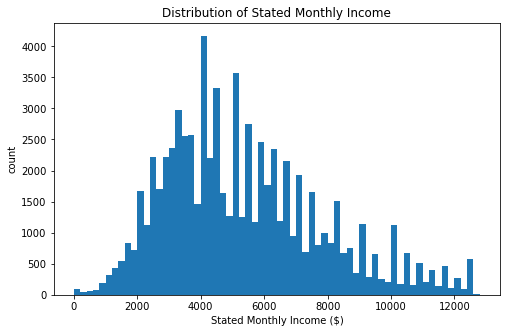

In [15]:
#plotting the resulting data,
binsize = 200
bins = np.arange(0, df_clean['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count')
plt.title('Distribution of Stated Monthly Income');

### Observation
The stated monthly income peaks somewhere between \\$4000 and $5000. It is a unimodal, almost normal distribution.

### QUESTION 2: Who gets more loans, HomeOwners or non HomeOwners?

### Visualization

<AxesSubplot:xlabel='IsBorrowerHomeowner', ylabel='count'>

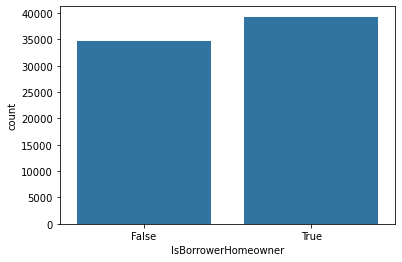

In [16]:
#to explore count,
sns.countplot(data=df_clean, x='IsBorrowerHomeowner', color=basecolor)

### Observation
There are more Homeowners taking loans than non-homeowners.

### QUESTION 3: What is the distribution of loans given across the months of the year

### Visualization

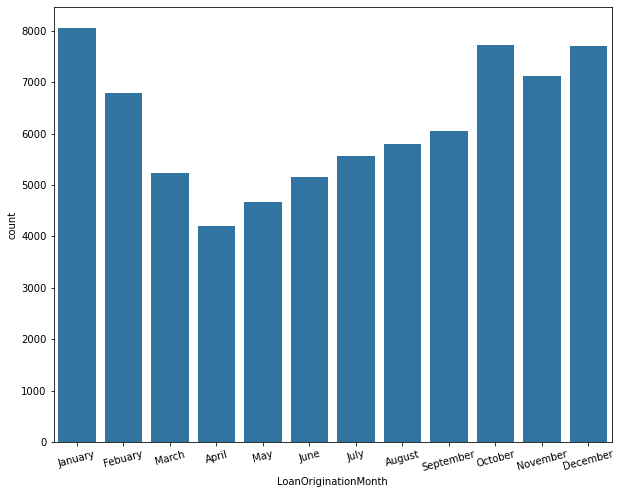

In [17]:
plt.figure(figsize=[10, 8])
sns.countplot(data = df_clean, x='LoanOriginationMonth', color=basecolor)
plt.xticks(rotation=15);

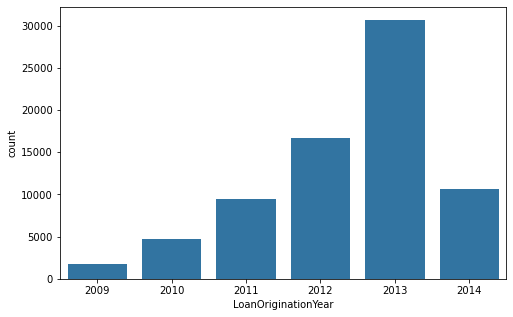

In [18]:
plt.figure(figsize=[8, 5])
sns.countplot(data = df_clean, x='LoanOriginationYear', color=basecolor);

### Observation

The year with the highest loans was 2013 and 2009 had the lowest. As for the months, January is the month with the highest number of loans and April has the lowest.

### QUESTION 4: What is the distribution of loans across state?

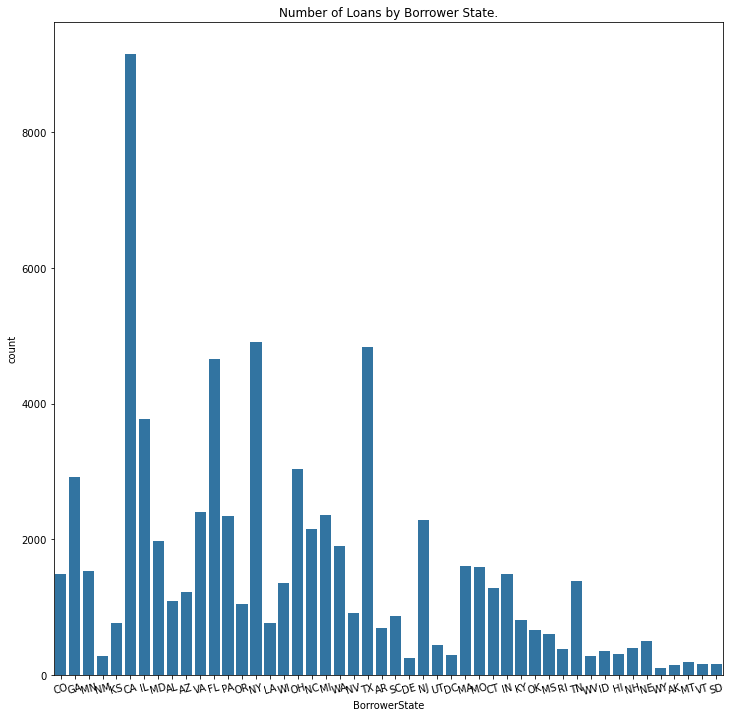

In [19]:
plt.figure(figsize=[12, 12])
sns.countplot(data = df_clean, x = 'BorrowerState', color=basecolor)
plt.title('Number of Loans by Borrower State.')
plt.xticks(rotation=15);

### Observation
CA has the highest number of loans given out of all the states in the dataset and WY has the lowest.

### QUESTION 5: Distribution of ProsperScore, ProsperRating and DebtToIncomeRatio

### Visualization

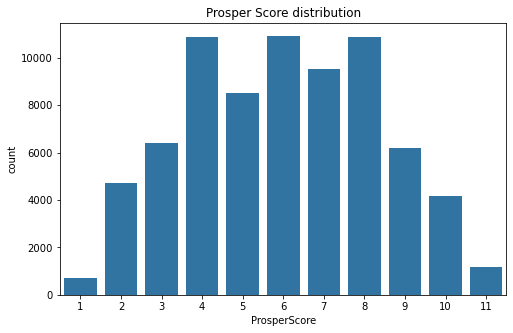

In [20]:
plt.figure(figsize=[8, 5])
sns.countplot(data = df_clean, x = 'ProsperScore', color=basecolor);
plt.title('Prosper Score distribution');

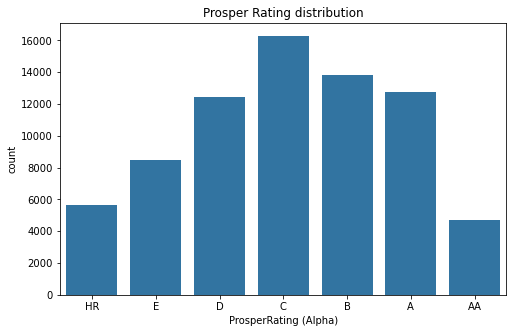

In [21]:
plt.figure(figsize=[8, 5])
sns.countplot(data = df_clean, x = 'ProsperRating (Alpha)', color=basecolor);
plt.title('Prosper Rating distribution');

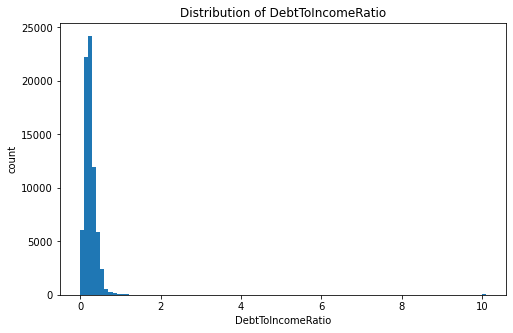

In [22]:
binsize = 0.1
bins = np.arange(0, df_clean['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('count');
plt.title('Distribution of DebtToIncomeRatio');

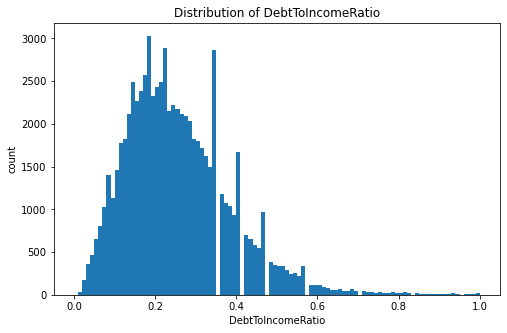

In [23]:
#taking a closer look,
binsize = 0.01
bins = np.arange(0, 1+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('count');
plt.title('Distribution of DebtToIncomeRatio');

### Observation
The highest propser scores are 4, 6 and 8.

the DebtToIncomeRatio is bimodal and peaks at a value close to 0.2 and then at about 0.35.

### QUESTION 6: Distribution of EmploymentStatus and EmploymentStatusDuration

### Visualization

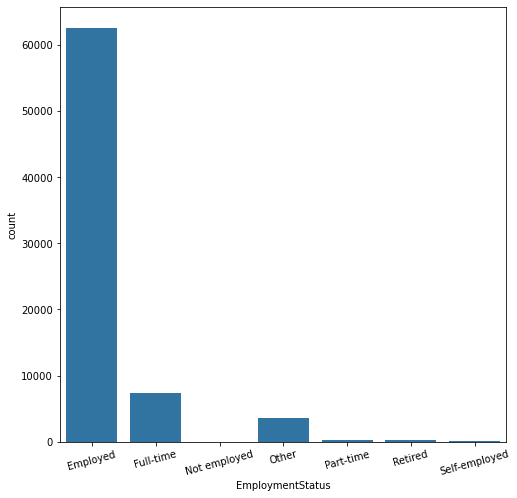

In [24]:
plt.figure(figsize=[8, 8])
sns.countplot(data=df_clean, x = 'EmploymentStatus', color=basecolor)
plt.xticks(rotation=15);

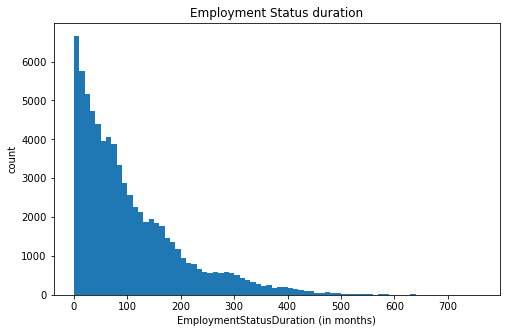

In [25]:
binsize = 10
bins = np.arange(0, df_clean['EmploymentStatusDuration'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'EmploymentStatusDuration', bins = bins);
plt.xlabel('EmploymentStatusDuration (in months)');
plt.ylabel('count');
plt.title('Employment Status duration');

### Observation
Most of the Borrowers are employed and have been employed for about 10months.

### QUESTION 7 : Distribution of LoanOriginalAmount

### Visualization

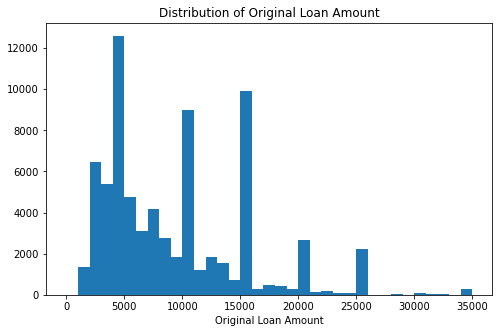

In [26]:
binsize = 1000
bins = np.arange(0, df_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Original Loan Amount')
plt.title('Distribution of Original Loan Amount');

### Observation
The most common Loan Amount is $5,000

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- For the StatedMonthlyIncome feature, there were too many outliers present in the data, so I used Interquartile ranges to get the ideal range of the feature without outliers. This was done so as to have a more accurate dataset that will not be affected by random points that lie too high or too low compared to other points.

## 4. Bivariate Exploration


### QUESTION 8: Relationship between numerical variables

### Visualization

df_clean.shape= (74035, 20)
df_clean.shape= (74035, 20)


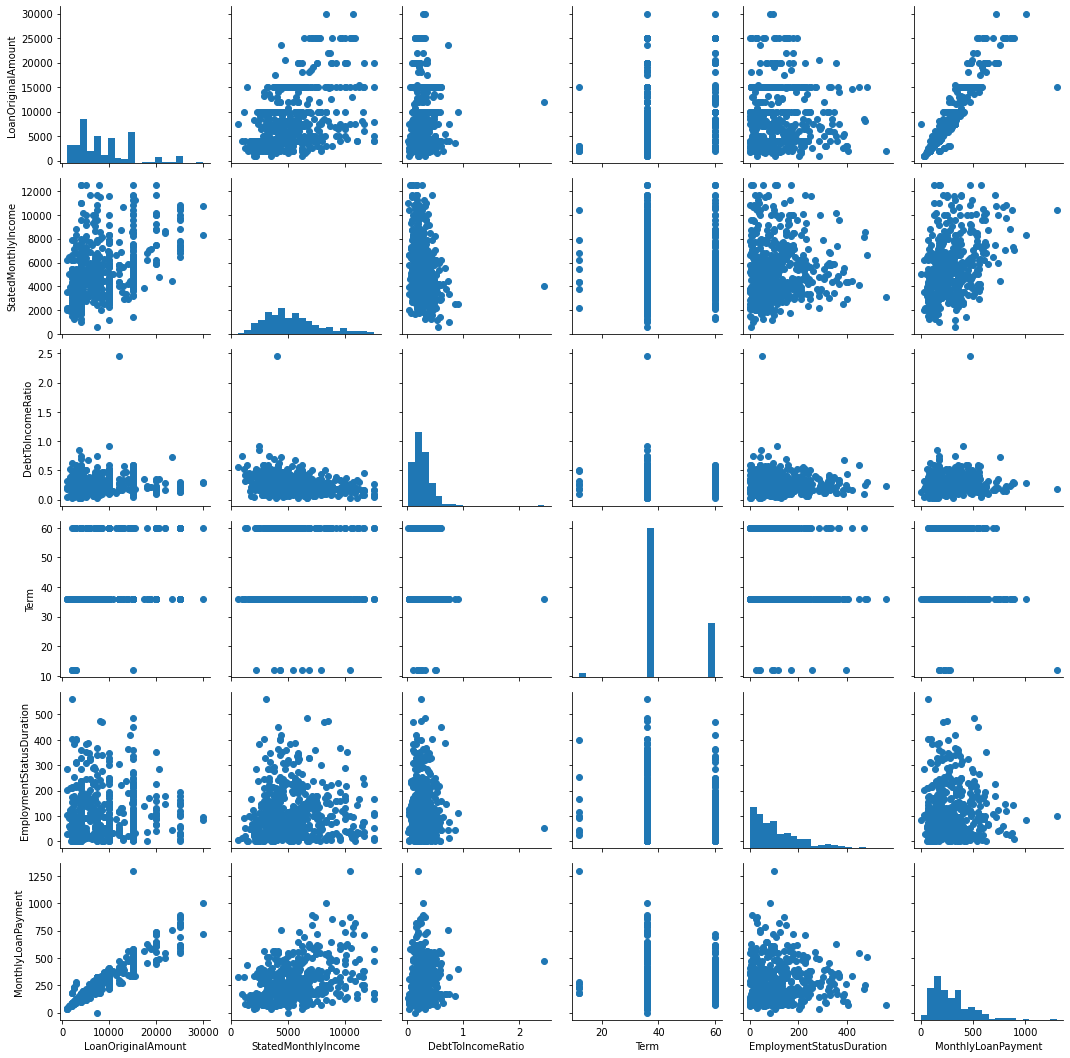

In [31]:
# placing numeric variables together and categorical together
numeric_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'Term', 'EmploymentStatusDuration', 'MonthlyLoanPayment']
categoric_vars = ['ProsperScore', 'ProsperRating (Alpha)','EmploymentStatus', 'IsBorrowerHomeowner', 'LoanStatus']

# plot matrix: sample 500 Loan data so that plots are clearer and they render faster
print("df_clean.shape=",df_clean.shape)
df_clean_samp = df_clean.sample(n=500, replace = False)
print("df_clean.shape=",df_clean_samp.shape)

g = sns.PairGrid(data = df_clean_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

<AxesSubplot:>

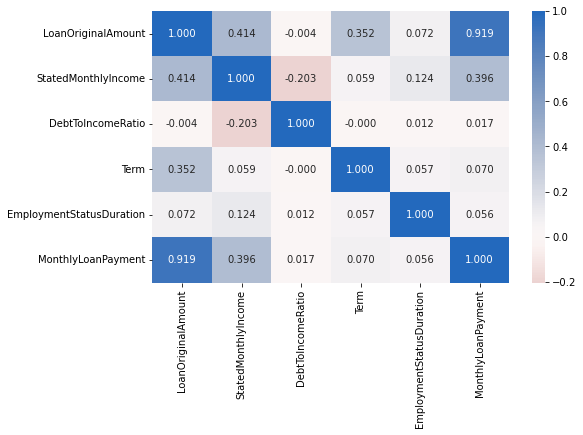

In [35]:
#Correlation plot of numerical variables
# placing numeric variables together and categorical together
plt.figure(figsize = [8, 5])
sns.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

### CONCLUSION
There is strong positive correlation between the LoanOriginalAmount and the MonthlyLoanPayment as expected.

### QUESTION 9: Relationship between LoanOriginalAmount, MonthlyLoanPayment and the categorical variables.

### VISUALIZATION

<Figure size 864x1080 with 0 Axes>

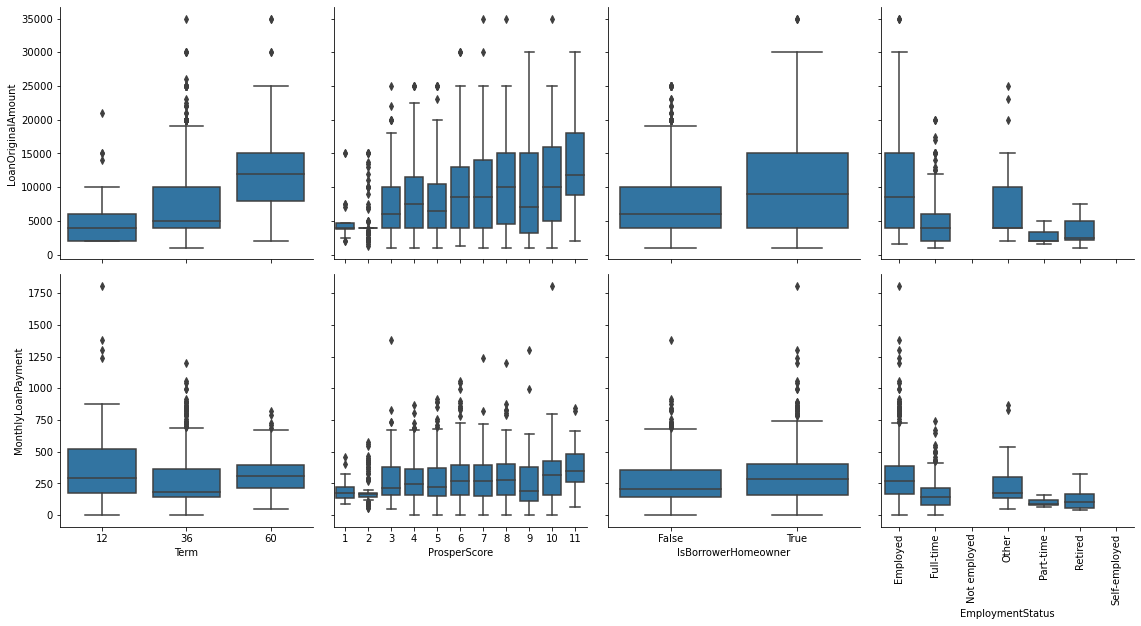

In [39]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.


df_clean_samp = df_clean.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    base_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=base_color);

plt.figure(figsize = [12, 15])
g = sns.PairGrid(data = df_clean_samp, y_vars = ['LoanOriginalAmount','MonthlyLoanPayment'], x_vars = ['Term','ProsperScore', 'IsBorrowerHomeowner',
                                                                                            'EmploymentStatus'],
                height= 4, aspect = 1.0)

g.map(boxgrid);
plt.xticks(rotation=90);

### CONCLUSION
Borrowers with the features (Longer Loan Term , best Prosper score/low risk, Home Owners, Employed) gets the Highest Loan Amount.
Borrowers with best Prosper Score(low risk), Employed or owning a home, tend to pay higher Loan Payment monthly.

### QUESTION 10: Relationship between ProsperScore and some categorical variables

### VISUALIZATION

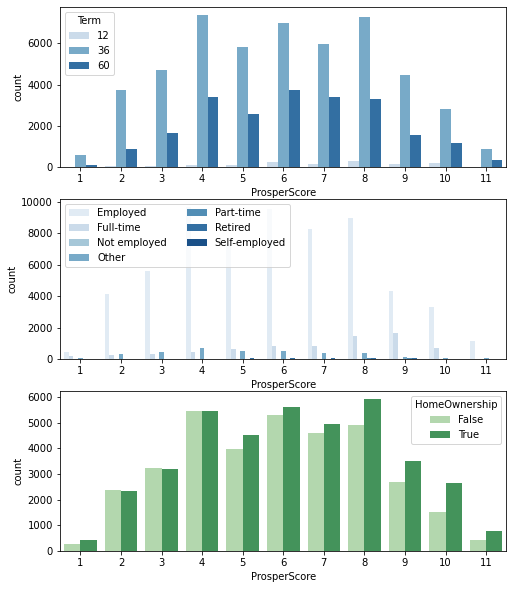

In [43]:
plt.figure(figsize = [8, 10])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sns.countplot(data = df_clean, x = 'ProsperScore', hue = 'Term', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df_clean, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sns.countplot(data = df_clean, x = 'ProsperScore', hue = 'IsBorrowerHomeowner', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.legend(title='HomeOwnership')

plt.show()

### CONCLUSION
The majority classes are Employed, Home Owners and Term36.

### QUESTION 11: Relationship between LoanOriginalAmount and MonthlyLoanPayment

### VISUALIZATION

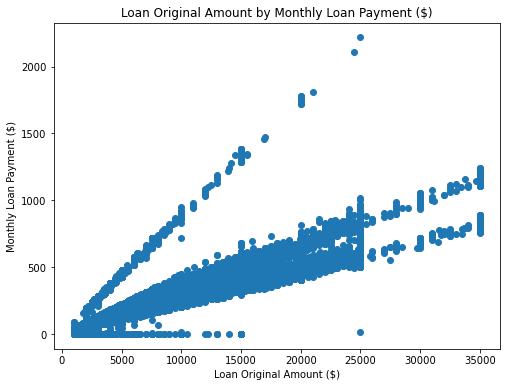

In [46]:
# scatter plot of LoanOriginalAmount vs. MonthlyLoanPayment

plt.figure(figsize = [8, 6])
plt.scatter(data = df_clean, y = 'MonthlyLoanPayment', x = 'LoanOriginalAmount')
plt.ylabel('Monthly Loan Payment ($)')
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount by Monthly Loan Payment ($)');

### CONCLUSION
There is a positive relationship between both variables, most likely because the LoanOriginalAmount is used to compute the MonthlyLoanPayment. The slopes give us an idea of the interest rate. It can be seen that the steeper the slope, the greater the interest rate on the Loan taken.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Loan Amount has a positive correlation with Monthly Income. With a High Monthly Income, the Loan Amount received is Higher.

An interesting discovery is that as Debt-To-Income-Ratio increases, the Loan Amount decreases as well. This is because Lenders classify a High Debt-To-Income-Ratio as a borrowinmg risk so they tend to Loan out less money to this category of people.

A positive linear relationship was observed was observed when Loan Amount was plotted against Monthly Loan Payment. The scatter plot showed 3 pair of lines. This will have to be explored/investigated further in the next section

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There was an interesting relationship between Loan Amount and the Categorical features. Most Loans are associated with Borrowers with a Longer loan Term, Low risk involved(high Prosper Score), Owning a Home and being successfully employed.


## 5. Multivariate Exploration


### QUESTION 12: LoanOriginalAmount vs MonthlyLoanPayment vs Term

### VISUALIZATION

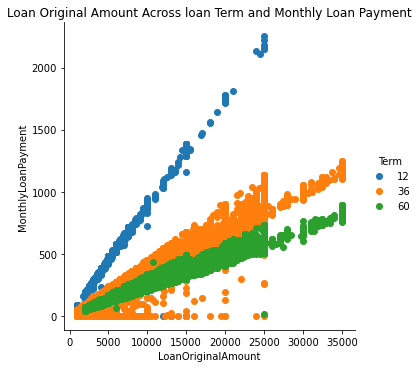

In [49]:
g = sns.FacetGrid(data = df, hue = 'Term', height = 5);
g.map(plt.scatter, 'LoanOriginalAmount',  'MonthlyLoanPayment');
plt.title('Loan Original Amount Across loan Term and Monthly Loan Payment')
g.add_legend();

### CONCLUSION
We can now see that the variation in slopes is due to the term on the loans. Longer loans tend to have lower Monthly Loan Payments.

### QUESTION 13: To examine whether being a Home Owner and having a good risk score will effect the Loan Amount

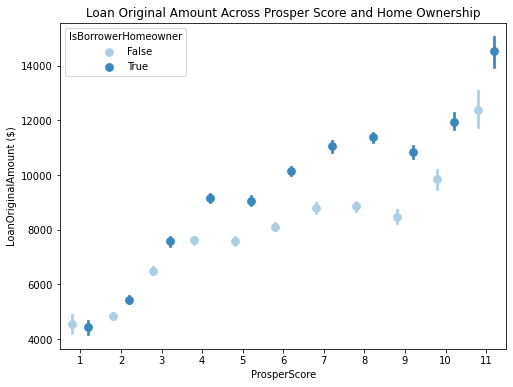

In [51]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df_clean, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Prosper Score and Home Ownership')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('ProsperScore')
plt.show();

### CONCLUSION
The plot above shows that home-owners with a good Prosper score(low risk) is likely to get a Large Loan Amount.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I discovered that though Loan Term plays a part in determining the amount of loan to be given out, it is also influenced by the Prosper score (risk score).That is, The Longer the Loan Term, and the better the risk score(Prosper Score), the larger the Loan Amount to be given out.


## Conclusions
In This exploratory analysis I discovered that more loans were issued in the year 2013 and also during January, October, November and December compared to other months. <br>

To be granted access to large loans one needs to have a good Debt-To-Income-Ratio( preferably 0.50 or lesser) dependent on Loan Type. <br>

To get a large loan as a borrower, I need to get have an Occupation that pays a Large Monthly Income. Or, at least have a Large Monthly Income<br>

Also, I need to have a good prosper Risk Score (10/11) and possibly own a Home as well.
